In [1]:
import darknet
import cv2
import tempfile
import os
import re
import imageio

configPath = "/storage/gs/rat-emotion/darknet/cfg/2020-06-02_yolo-obj.cfg"
weightPath = "/storage/gs/rat-emotion/darknet/weights/2020-06-07/2020-06-02_yolo-obj_7000.weights"
video = "/storage/gs/rat-emotion/videos/24fps/rat8-control2.mp4"
metaPath = "/storage/gs/rat-emotion/darknet/labeled_data/2020-06-07/obj.data"
    
# Load the model
net = darknet.load_net_custom(configPath.encode("ascii"), weightPath.encode("ascii"), 0, 1)
meta = darknet.load_meta(metaPath.encode("ascii"))
net_width, net_height = (darknet.network_width(net), darknet.network_height(net))

cap = cv2.VideoCapture(video)

[]

In [13]:
ret, frame = cap.read()
im, arr = darknet.array_to_image(frame)
res = darknet.detect_image(net, meta, im, thresh=.5, hier_thresh=.5, nms=.45, debug= False)
res

[(b'rat',
  0.9141064882278442,
  (1124.7501220703125,
   970.5037231445312,
   721.2637329101562,
   469.68682861328125))]

In [25]:
ls /storage/gs/rat-emotion/darknet/weights/2020-06-07

2020-06-02_yolo-obj_1000.weights  2020-06-02_yolo-obj_5000.weights
2020-06-02_yolo-obj_2000.weights  2020-06-02_yolo-obj_6000.weights
2020-06-02_yolo-obj_3000.weights  2020-06-02_yolo-obj_7000.weights
2020-06-02_yolo-obj_4000.weights  2020-06-02_yolo-obj_last.weights


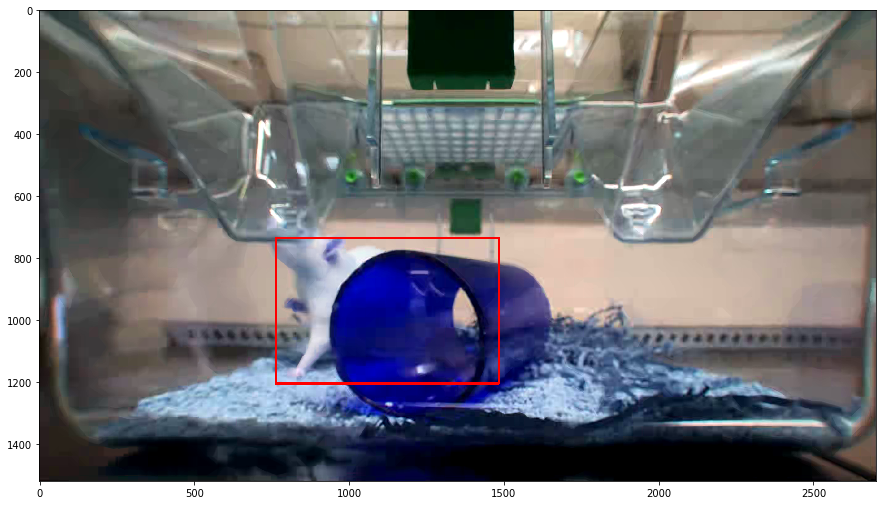

In [16]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))

test = frame.copy()
for obj in res:
    name, confidence, (x, y, w, h) = obj
    x0, y0 = int(x - w/2), int(y - h/2)
    x1, y1 = int(x + w/2), int(y + h/2)
    test = cv2.rectangle(test, (x0,y0), (x1, y1), (255,0,0), 5)

plt.imshow(test)

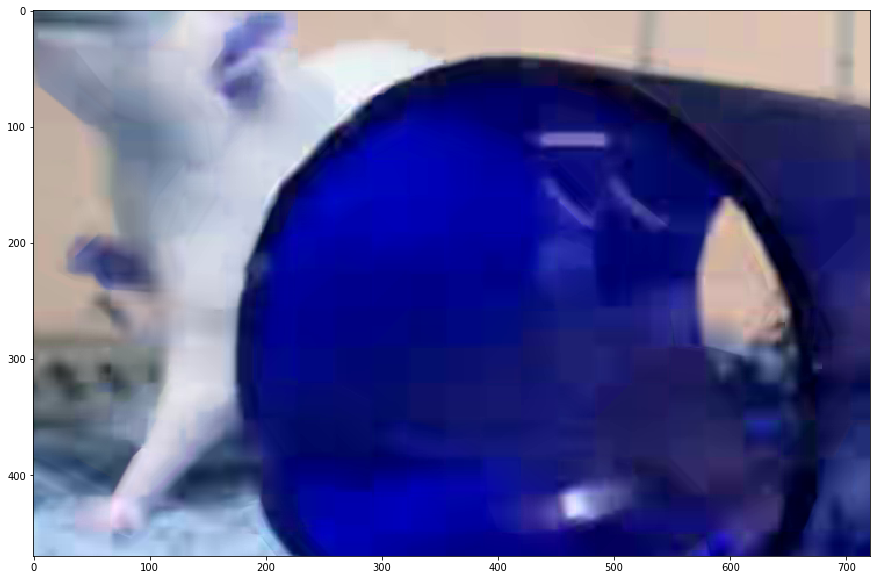

In [18]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15,15))

test = frame.copy()
for obj in res:
    name, confidence, (x, y, w, h) = obj
    x0, y0 = int(x - w/2), int(y - h/2)
    x1, y1 = int(x + w/2), int(y + h/2)
    test = test[y0:y1, x0:x1]

plt.imshow(test)

In [33]:
darknet??


Type:        module
String form: <module 'darknet' from '/root/miniconda/envs/darknet/lib/python3.6/site-packages/darknet.py'>
File:        ~/miniconda/envs/darknet/lib/python3.6/site-packages/darknet.py
Source:     
#!python3
"""
Python 3 wrapper for identifying objects in images

Requires DLL compilation

Both the GPU and no-GPU version should be compiled; the no-GPU version should be renamed "yolo_cpp_dll_nogpu.dll".

On a GPU system, you can force CPU evaluation by any of:

- Set global variable DARKNET_FORCE_CPU to True
- Set environment variable CUDA_VISIBLE_DEVICES to -1
- Set environment variable "FORCE_CPU" to "true"


To use, either run performDetect() after import, or modify the end of this file.

See the docstring of performDetect() for parameters.

Directly viewing or returning bounding-boxed images requires scikit-image to be installed (`pip install scikit-image`)


Original *nix 2.7: https://github.com/pjreddie/darknet/blob/0f110834f4e18b30d5f101bf8f1724c34b7b83db/python